<a href="https://colab.research.google.com/github/20144481NguyenMinhTruong/NguyenMinhTruong20144481/blob/main/PROJECT_CUOI_KI_NGUYEN_MINH_TRUONG_20144481.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Khai báo và sử dụng các thư viện sau
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils import validation 
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/PROJECT/XÁC ĐỊNH SÂU BỆNH TRÊN CÂY NGÔ

/content/drive/MyDrive/Colab Notebooks/PROJECT/XÁC ĐỊNH SÂU BỆNH TRÊN CÂY NGÔ


In [ ]:
# Tạo ra class ImageDataGenerator để chỉnh sửa ảnh 
train_datagen=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [ ]:
# Tạo bộ dữ liệu training set
training_set=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/PROJECT/XÁC ĐỊNH SÂU BỆNH TRÊN CÂY NGÔ/TRAIN',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 5457 images belonging to 3 classes.


In [ ]:
# Tạo bộ dữ liệu validation
validation=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/PROJECT/XÁC ĐỊNH SÂU BỆNH TRÊN CÂY NGÔ/Validation',target_size=(150,150), batch_size=32, class_mode='categorical')

Found 1364 images belonging to 3 classes.


In [ ]:
# Các nhãn có trong bộ dữ liệu training set
training_set.class_indices

{'Bệnh gỉ sắt': 0, 'Bệnh tàn rụi': 1, 'bệnh ố lá': 2}

In [ ]:
# Các nhãn có trong bộ dữ liệu validation
validation.class_indices

{'Bệnh ố lá': 0, 'Bệnh rỉ sắt': 1, 'Bệnh tàn rụi': 2}

In [ ]:
# Tạo ra mạng CNN để train mô hình
model=Sequential()
# Tích chập 32 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 64 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Tích chập 128 lần với mỗi lần là 3 hàng 3 cột
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# Lấy phần tử lớn nhất ở trong 2 hàng và 2 cột
model.add(MaxPooling2D(2,2))
# Duỗi thẳng dữ liệu 
model.add(Flatten())
# Tạo lớp ẩn thứ nhất với 128 tín hiệu ra
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
# Tạo lớp ẩn thứ hai với 3 tín hiệu ra
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                    

In [ ]:
# Biên dịch 
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Gán biến lại để vẽ đồ thị, với 300 lần học (epochs), mỗi lần học thì chỉ học␣128 dữ liệu (batch_size), khi sai số không thay đổi trong 20 lần học thì sẽ␣ dừng học 
history=model.fit(training_set,epochs=300,batch_size=128,verbose=1, validation_data=validation, callbacks=[EarlyStopping(monitor='val_loss', patience=30)])

Epoch 1/300
171/171 [==============================] - 248s 1s/step - loss: 0.5245 - accuracy: 0.8345 - val_loss: 10.5881 - val_accuracy: 0.0051
Epoch 2/300
171/171 [==============================] - 53s 311ms/step - loss: 0.2267 - accuracy: 0.9203 - val_loss: 15.1476 - val_accuracy: 0.0198
Epoch 3/300
171/171 [==============================] - 53s 312ms/step - loss: 0.1638 - accuracy: 0.9373 - val_loss: 9.0344 - val_accuracy: 0.0557
Epoch 4/300
171/171 [==============================] - 52s 302ms/step - loss: 0.1460 - accuracy: 0.9458 - val_loss: 15.6704 - val_accuracy: 0.0081
Epoch 5/300
171/171 [==============================] - 51s 299ms/step - loss: 0.1459 - accuracy: 0.9459 - val_loss: 16.9422 - val_accuracy: 0.0242
Epoch 6/300
171/171 [==============================] - 52s 304ms/step - loss: 0.1223 - accuracy: 0.9542 - val_loss: 19.3007 - val_accuracy: 0.0051
Epoch 7/300
171/171 [==============================] - 52s 307ms/step - loss: 0.1140 - accuracy: 0.9579 - val_loss: 16.66

In [ ]:
# Đánh giá độ chính xác của mô hình 
Score=model.evaluate(training_set,verbose=0)
print('Train Loss', Score[0])
print('Train Accuracy', Score[1])

Train Loss 0.02113495022058487
Train Accuracy 0.9928532242774963


<function matplotlib.pyplot.show(*args, **kw)>

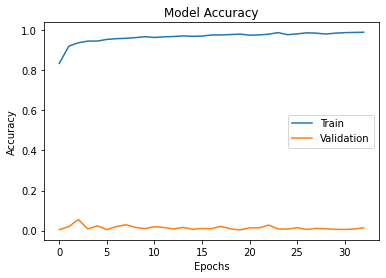

In [ ]:
# Vẽ đồ thị giữa số lần học (Epochs) và độ chính xác (Accuracy)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train','Validation'])
plt.show

In [ ]:
# Lưu lại
model.save("Corn.h5")

In [ ]:
# Tải mô hình 
model_CNN=load_model('Corn.h5')

1/1 [==============================] - 0s 431ms/step
Bệnh tàn rụi


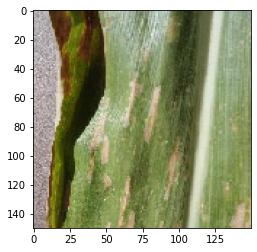

1/1 [==============================] - 0s 20ms/step
Bệnh tàn rụi


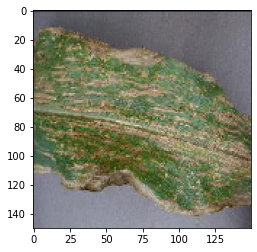

1/1 [==============================] - 0s 17ms/step
Bệnh tàn rụi


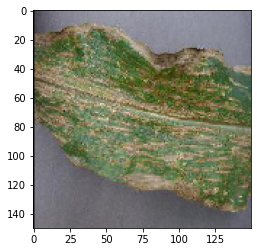

1/1 [==============================] - 0s 16ms/step
Bệnh tàn rụi


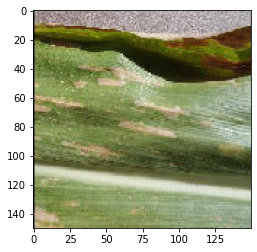

1/1 [==============================] - 0s 18ms/step
Bệnh tàn rụi


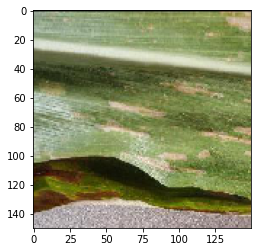

1/1 [==============================] - 0s 15ms/step
Bệnh ố lá


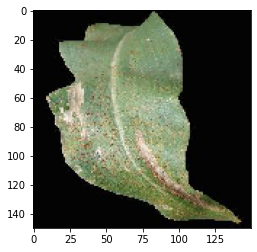

1/1 [==============================] - 0s 18ms/step
Bệnh ố lá


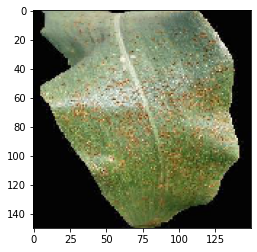

1/1 [==============================] - 0s 17ms/step
Bệnh ố lá


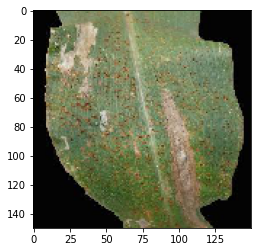

1/1 [==============================] - 0s 15ms/step
Bệnh ố lá


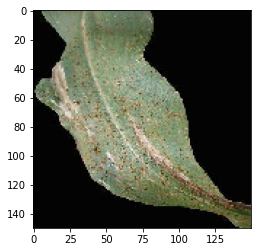

1/1 [==============================] - 0s 15ms/step
Bệnh ố lá


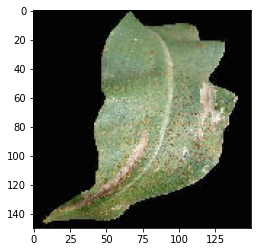

1/1 [==============================] - 0s 16ms/step
Bệnh rỉ sắt


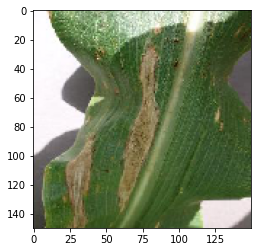

1/1 [==============================] - 0s 17ms/step
Bệnh rỉ sắt


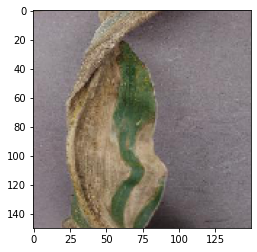

1/1 [==============================] - 0s 16ms/step
Bệnh rỉ sắt


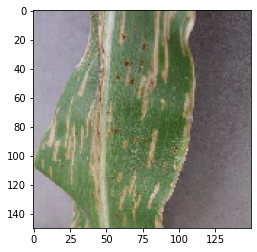

1/1 [==============================] - 0s 19ms/step
Bệnh rỉ sắt


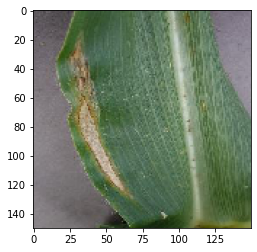

1/1 [==============================] - 0s 23ms/step
Bệnh rỉ sắt


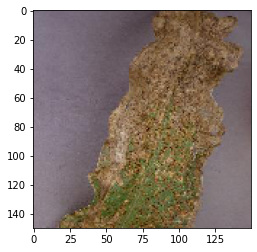

In [ ]:
test="/content/drive/MyDrive/Colab Notebooks/PROJECT/XÁC ĐỊNH SÂU BỆNH TRÊN CÂY NGÔ/TEST"

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=model_CNN.predict(img)
  if round(result[0][0])==1:
    prediction='Bệnh ố lá'
  if round(result[0][1])==1:
    prediction='Bệnh rỉ sắt'
  if round(result[0][2])==1:
    prediction='Bệnh tàn rụi'
  print(prediction)
  plt.show()